<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1202/78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Wed Dec  2 13:44:39 UTC 2020


In [2]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

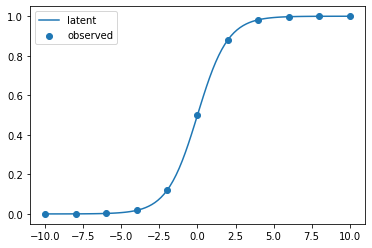

In [4]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.legend()
plt.show()

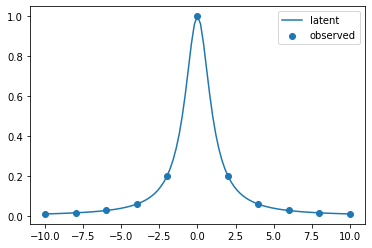

In [5]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.legend()
plt.show()

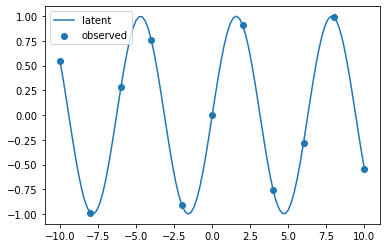

In [6]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.legend()
plt.show()

# 解法１

In [7]:
def get_coeff(i, x, x_observed):
    c = 1
    for j in range(len(x_observed)):
        if j != i:
            c *= (x - x_observed[j]) / (x_observed[i] - x_observed[j])
    return c

In [8]:
def lagrange(x, x_observed, y_observed):
    sum = 0
    for i in range(len(x_observed)):
        sum += get_coeff(i, x, x_observed) * y_observed[i]
    return sum

In [9]:
lagrange(x_latent, x_observed, fx_observed)

array([ 4.53978687e-05,  7.79786705e-02,  1.17602966e-01,  1.30214551e-01,
        1.24767938e-01,  1.08227872e-01,  8.58834396e-02,  6.16271185e-02,
        3.82014174e-02,  1.74156638e-02,  3.35350130e-04, -1.25536578e-02,
       -2.12038685e-02, -2.58858012e-02, -2.70865541e-02, -2.54254575e-02,
       -2.15850699e-02, -1.62558803e-02, -1.00931783e-02, -3.68465319e-03,
        2.47262316e-03,  7.98708210e-03,  1.25805754e-02,  1.60904005e-02,
        1.84664273e-02,  1.97642373e-02,  2.01351090e-02,  1.98136080e-02,
        1.91034675e-02,  1.83623744e-02,  1.79862100e-02,  1.83932296e-02,
        2.00086053e-02,  2.32496942e-02,  2.85123424e-02,  3.61584798e-02,
        4.65052104e-02,  5.98155569e-02,  7.62909711e-02,  9.60656835e-02,
        1.19202922e-01,  1.45692997e-01,  1.75453213e-01,  2.08329544e-01,
        2.44099967e-01,  2.82479340e-01,  3.23125677e-01,  3.65647663e-01,
        4.09613209e-01,  4.54558886e-01,  5.00000000e-01,  5.45441114e-01,
        5.90386791e-01,  

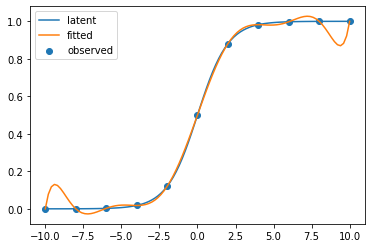

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, lagrange(x_latent, x_observed, fx_observed), label='fitted')
plt.legend()
plt.show()

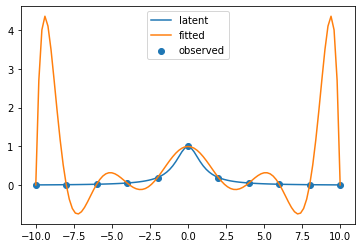

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, lagrange(x_latent, x_observed, gx_observed), label='fitted')
plt.legend()
plt.show()

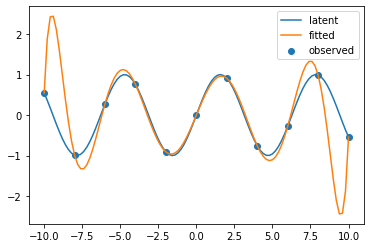

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, lagrange(x_latent, x_observed, hx_observed), label='fitted')
plt.legend()
plt.show()

In [13]:
!date

Wed Dec  2 13:44:41 UTC 2020


# 解法２

In [14]:
def lagurange(x_latent, x_observed, y_observed):
    interpolation = 0
    px = [1] * len(x_observed)
    qx = [1] * len(x_observed)
    for i in range (len(x_observed)):
        for j in range (len(x_observed)):
            if i != j:
                px[i] = px[i] * (x_latent - x_observed[j])
                qx[i] = qx[i] * (x_observed[i] - x_observed[j])
        interpolation = interpolation + px[i] * y_observed[i] / qx[i]
    return interpolation

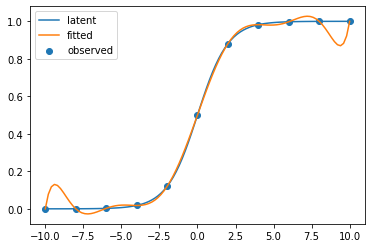

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, lagurange(x_latent, x_observed, fx_observed), label='fitted')
plt.legend()
plt.show()

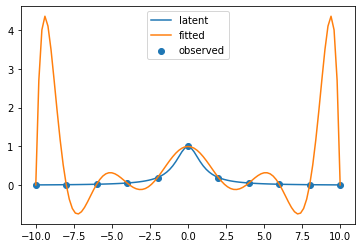

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, lagurange(x_latent, x_observed, gx_observed), label='fitted')
plt.legend()
plt.show()

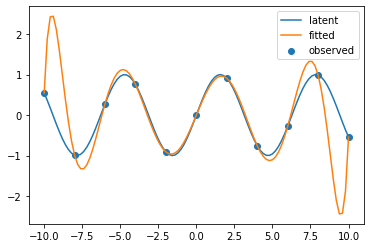

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, lagurange(x_latent, x_observed, hx_observed), label='fitted')
plt.legend()
plt.show()

In [18]:
!date

Wed Dec  2 13:44:41 UTC 2020
